ML Application Assignment
Group Members - Isha Mahurkar, Shruthi Sridhar
ADMN5016 - Applied Artificial Intelligence and Machine Learning
August 01, 2023

### Credit Risk Prediction 

In [66]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df =  pd.read_csv("G:/Ishas Documents/SLC Course/Semester 3/ADMN5016- Applied Artificial Intelligence and Machine Learning/Model - Assignment/credit_risk_dataset/credit_risk_dataset.csv") 

In [67]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [68]:
#Displaying the descriptive statistics
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


**Dealing with Null Values

In [70]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [71]:
# drop values that are null
df.dropna(axis=0,inplace=True)

In [7]:
#Check for the null values after dropping the null values
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [72]:
df['loan_status'].value_counts()

0    22435
1     6203
Name: loan_status, dtype: int64

**Dealing with Outliers

In [73]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


From the descriptive statistics, we can see the max of person_age is 144 which is because of an outlier. The person_emp_length has a max value of 123.

In [74]:
#person_age max 144 (outlier)
#person_emp_length max 123 (Outlier)
df.reset_index(inplace = True)    #The purpose of resetting the index could be to address any irregularities or inconsistencies in the index caused by previous operations or data manipulations.

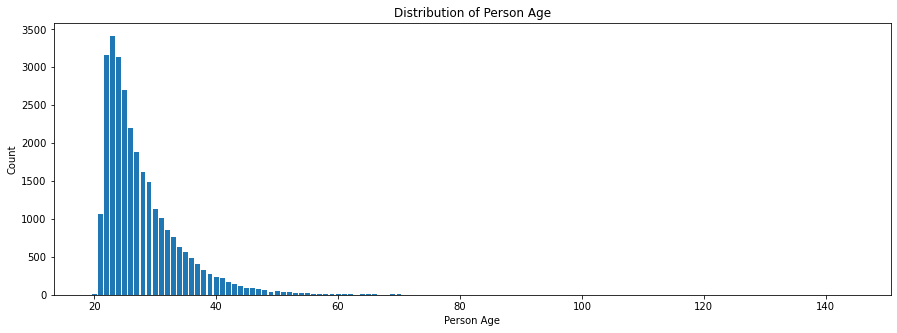

In [75]:
#Plotting on a graph 
age_xaxis = df['person_age'].value_counts().values
count_yaxis = df['person_age'].value_counts().index
fig = plt.figure(figsize = (15, 5))
plt.bar(count_yaxis, age_xaxis)
plt.xlabel('Person Age')
plt.ylabel('Count')
plt.title('Distribution of Person Age')
plt.show()

Here we are setting the threshold for a person's age to be 80. Hence we are going to drop the values from person_age column to deal with outliers in the column

In [76]:
#Dropping rows that have person_age greater than 80
(df['person_age'].value_counts().values>80).sum()

26

26 rows have been dropped from the person_age column as the values for these 26 rows is greater than 80.

Creating New Features by Grouping

In [77]:
max_ = df['person_age'].max()
min_ = df['person_age'].min()
print(f"maximum {max_}")    #The 'f-string' is used here to embed the value of the 'max_' variable into the printed string.
print(f"minimum {min_}")    #The 'f-string' is used here to embed the value of the 'min_' variable into the printed string.

maximum 144
minimum 20


In [78]:
#Dropping the person age above 90
df = df.drop(df[df['person_age'] > 80].index, axis=0)
df.describe()

,index,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28633.000000,28633.000000,2.863300e+04,28633.00000,28633.000000,28633.000000,28633.000000,28633.000000,28633.000000
mean,16292.791953,27.709741,6.642964e+04,4.78867,9656.565851,11.039841,0.216638,0.169503,5.792757
std,9385.648214,6.163130,5.155164e+04,4.15470,6329.755492,3.229529,0.411961,0.106389,4.035676
min,0.000000,20.000000,4.000000e+03,0.00000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8162.000000,23.000000,3.945600e+04,2.00000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16284.000000,26.000000,5.590000e+04,4.00000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24434.000000,30.000000,8.000000e+04,7.00000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,32580.000000,80.000000,2.039784e+06,123.00000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [79]:
# Sorting individuals with an age between x and y ranges
def age_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = df['person_age'].between(next,arr[i+1]).sum()
        print(f'There are {num_people} people with an age between {next} and {arr[i+1]}.')
        
age_group([0 ,18, 26, 36, 46, 56, 66])

print(df.shape[0])   

There are 0 people with an age between 1 and 18.
There are 15682 people with an age between 19 and 26.
There are 10422 people with an age between 27 and 36.
There are 2054 people with an age between 37 and 46.
There are 372 people with an age between 47 and 56.
There are 87 people with an age between 57 and 66.
28633


In [80]:
df['age_group'] = pd.cut(df['person_age'],
                           bins=[20, 26, 36, 46, 56, 66],
                           labels=['20-25', '26-35', '36-45', '46-55', '56-65'])

In [81]:
df['age_group'].dtype

CategoricalDtype(categories=['20-25', '26-35', '36-45', '46-55', '56-65'], ordered=True)

In [82]:
df.head()

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group
0,0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,20-25
1,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25
2,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25
3,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25
4,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25


In [83]:
df.shape

(28633, 14)

# Income Group

In [86]:
max_ = df['person_income'].max()
min_ = df['person_income'].min()

print(f"maximum {max_}")   #The 'f-string' is used here to embed the value of the 'max_' variable into the printed string.
print(f"minimum {min_}")   #The 'f-string' is used here to embed the value of the 'min_' variable into the printed string.

maximum 2039784
minimum 4000


In [88]:
# Individuals with an income between x and y range
def income_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = df['person_income'].between(next,arr[i+1]).sum()
        print(f'There are {num_people} people with an income between {next} and {arr[i+1]}.')
        
income_group([0, 25000, 50000, 75000, 100000,float('inf')])

print(df.shape[0]) 

There are 1972 people with an income between 1 and 25000.
There are 10198 people with an income between 25001 and 50000.
There are 8532 people with an income between 50001 and 75000.
There are 4197 people with an income between 75001 and 100000.
There are 3734 people with an income between 100001 and inf.
28633


In [89]:
df['income_group'] = pd.cut(df['person_income'],
                              bins=[0, 25000, 50000, 75000, 100000, float('inf')],
                              labels=['low', 'low-middle', 'middle', 'high-middle', 'high'])

In [90]:
df['income_group']

0             middle
1                low
2                low
3             middle
4             middle
            ...     
28633         middle
28634           high
28635    high-middle
28636           high
28637     low-middle
Name: income_group, Length: 28633, dtype: category
Categories (5, object): ['low' < 'low-middle' < 'middle' < 'high-middle' < 'high']

# **Loan Amount

In [93]:
max_loan_amount = df['loan_amnt'].max()
min_loan_amount = df['loan_amnt'].min()

print(f"maximum {max_loan_amount}")
print(f"minimum {min_loan_amount}")

maximum 35000
minimum 500


In [94]:
# People with an income between x and y ranges
def loan_amount_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = df['loan_amnt'].between(next,arr[i+1]).sum()
        print(f'There are {num_people} people with an loan_amount between {next} and {arr[i+1]}.')
        
loan_amount_group([0, 5000, 10000, 15000, float('inf')])

print(df.shape[0])

There are 8182 people with an loan_amount between 1 and 5000.
There are 10608 people with an loan_amount between 5001 and 10000.
There are 5430 people with an loan_amount between 10001 and 15000.
There are 4413 people with an loan_amount between 15001 and inf.
28633


In [95]:
#Computing the lengths of groups of loan
df['loan_amount_group'] = pd.cut(df['loan_amnt'],
                                   bins=[0, 5000, 10000, 15000, float('inf')],
                                   labels=['small', 'medium', 'large', 'very large'])

In [96]:
#Displaying the lengths of groups of loan
df['loan_amount_group']

0        very large
1             small
2            medium
3        very large
4        very large
            ...    
28633        medium
28634    very large
28635    very large
28636         large
28637        medium
Name: loan_amount_group, Length: 28633, dtype: category
Categories (4, object): ['small' < 'medium' < 'large' < 'very large']

In [97]:
df = df.drop(df[df['person_emp_length'] > 60].index, axis=0)
df

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group
1,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small
2,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium
3,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large
4,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large
5,5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28633,32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,56-65,middle,medium
28634,32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,46-55,high,very large
28635,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,56-65,high-middle,very large
28636,32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,46-55,high,large


In [98]:
df = df.drop(['index'], axis=1)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28633,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,56-65,middle,medium
28634,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,46-55,high,very large
28635,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,56-65,high-middle,very large
28636,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,46-55,high,large


In [99]:
df.reset_index(inplace = True)
df = df.drop(['index'], axis=1)

In [100]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small


In [101]:
df['person_home_ownership'].value_counts()

RENT        14548
MORTGAGE    11797
OWN          2192
OTHER          94
Name: person_home_ownership, dtype: int64

In [102]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small


In [103]:
# Create loan-to-income ratio
df['loan_to_income_ratio'] = df['loan_amnt'] / df['person_income']

# Create loan-to-employment length ratio
df['loan_to_emp_length_ratio'] =  df['person_emp_length']/ df['loan_amnt'] 

# Create interest rate-to-loan amount ratio
df['int_rate_to_loan_amt_ratio'] = df['loan_int_rate'] / df['loan_amnt']

In [104]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'age_group',
       'income_group', 'loan_amount_group', 'loan_to_income_ratio',
       'loan_to_emp_length_ratio', 'int_rate_to_loan_amt_ratio'],
      dtype='object')

# Feature Engineering

In [106]:
col_list = ['person_age',#
 'person_income',#
 'person_home_ownership',#
 'person_emp_length',#
 'loan_intent', #
 'loan_grade',#
 'loan_amnt',#
 'loan_int_rate',#
 'loan_status',#
 'loan_percent_income',#
 'cb_person_default_on_file',#
 'cb_person_cred_hist_length',
'age_group',
'income_group',
'loan_amount_group']

drop_colums = []
scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income','loan_to_income_ratio', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']
ohe_colums = ['cb_person_default_on_file','loan_grade', 'person_home_ownership','loan_intent','income_group','age_group','loan_amount_group']
le_colums = []

In [107]:
df = df.drop(drop_colums, axis=1)

In [108]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'age_group',
       'income_group', 'loan_amount_group', 'loan_to_income_ratio',
       'loan_to_emp_length_ratio', 'int_rate_to_loan_amt_ratio'],
      dtype='object')

In [109]:
X = df.drop(['loan_status'], axis=1)
Y = df['loan_status']

In [111]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=12)

In [112]:
print(x_train.shape,x_test.shape)

(22904, 17) (5727, 17)


In [113]:
x_train.reset_index(inplace = True)
x_test.reset_index(inplace = True)

In [114]:
x_train.columns

Index(['index', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'age_group', 'income_group',
       'loan_amount_group', 'loan_to_income_ratio', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio'],
      dtype='object')

In [115]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(x_train[ohe_colums])

OneHotEncoder()

In [116]:
ohe.categories_

[array(['N', 'Y'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object),
 array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object),
 array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
        'PERSONAL', 'VENTURE'], dtype=object),
 array(['high', 'high-middle', 'low', 'low-middle', 'middle'], dtype=object),
 array(['20-25', '26-35', '36-45', '46-55', '56-65', nan], dtype=object),
 array(['large', 'medium', 'small', 'very large'], dtype=object)]

In [117]:
merge_ohe_col = np.concatenate((ohe.categories_[0], 
                ohe.categories_[1],
                ohe.categories_[2],
                ohe.categories_[3],
                ohe.categories_[4],
                ohe.categories_[5],
                ohe.categories_[6],))

In [118]:
merge_ohe_col

array(['N', 'Y', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'MORTGAGE', 'OTHER',
       'OWN', 'RENT', 'DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT',
       'MEDICAL', 'PERSONAL', 'VENTURE', 'high', 'high-middle', 'low',
       'low-middle', 'middle', '20-25', '26-35', '36-45', '46-55',
       '56-65', nan, 'large', 'medium', 'small', 'very large'],
      dtype=object)

In [119]:
ohe_data = pd.DataFrame(ohe.transform(x_train[ohe_colums]).toarray(), columns=merge_ohe_col)
ohe_data2 = pd.DataFrame(ohe.transform(x_test[ohe_colums]).toarray(),columns=merge_ohe_col)

In [120]:
X_new = pd.concat([ohe_data, x_train], axis=1)
X_new = X_new.drop(ohe_colums, axis=1)


X_new_test = pd.concat([ohe_data2, x_test], axis=1)
X_new_test = X_new_test.drop(ohe_colums, axis=1)

In [121]:
X_new.head()
X_new.shape

(22904, 45)

In [122]:
X_new_test.head()

,N,Y,A,B,C,D,E,F,G,MORTGAGE,...,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,35,66000,4.0,3000,6.03,0.05,7,0.045455,0.001333,0.002010
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,35,33144,3.0,8400,14.91,0.25,8,0.253440,0.000357,0.001775
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,32,36000,4.0,6000,16.07,0.17,10,0.166667,0.000667,0.002678
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,25,61500,1.0,18000,13.23,0.29,2,0.292683,0.000056,0.000735
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32,24000,7.0,2800,10.99,0.12,9,0.116667,0.002500,0.003925


In [123]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']

uniform_col= []

normal_col = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']

bimodal_col = []

scaler_uniform = MinMaxScaler()
#X_new.loc[:,uniform_col] = scaler_uniform.fit_transform(X_new.loc[:,uniform_col])
#X_new_test.loc[:,uniform_col] = scaler_uniform.transform(X_new_test.loc[:,uniform_col])

scaler_normal = StandardScaler()
X_new.loc[:,normal_col] = scaler_normal.fit_transform(X_new.loc[:,normal_col])
X_new_test.loc[:,normal_col] = scaler_normal.transform(X_new_test.loc[:,normal_col])

scaler_bimodal = RobustScaler()
#X_new.loc[:,bimodal_col] = scaler_bimodal.fit_transform(X_new.loc[:,bimodal_col])
#X_new_test.loc[:,bimodal_col] = scaler_bimodal.transform(X_new_test.loc[:,bimodal_col])

In [124]:
X_new_test.head()

,N,Y,A,B,C,D,E,F,G,MORTGAGE,...,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.181707,-0.006231,-0.192831,-1.052710,-1.556377,-1.123388,0.296643,0.045455,0.530868,0.076675
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.181707,-0.655354,-0.440648,-0.197407,1.195223,0.757473,0.543970,0.253440,-0.380924,-0.049526
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.695186,-0.598929,-0.192831,-0.577541,1.554667,0.005128,1.038624,0.166667,-0.091820,0.435586
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.440030,-0.095136,-0.936282,1.323133,0.674650,1.133645,-0.939991,0.292683,-0.662616,-0.608033
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.695186,-0.836009,0.550621,-1.084388,-0.019447,-0.465087,0.791297,0.116667,1.620571,1.105078


# Modeling

In [126]:
#Inporting the libraries for the ensembles:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [128]:
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()

In [129]:
 clfs = {
  'DT': dtc, 
  'RF': rfc, 
 }

In [130]:
from sklearn.metrics import precision_score,accuracy_score
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [131]:
X_new = X_new.drop(columns=[col for col in X_new.columns if pd.isna(col)], axis=1)
X_new_test = X_new_test.drop(columns=[col for col in X_new_test.columns if pd.isna(col)], axis=1)

In [132]:
#Metrics to predict the model 
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_new,y_train,X_new_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  DT
Accuracy -  0.8885978697398289
Precision -  0.7370892018779343
For  RF
Accuracy -  0.9317269076305221
Precision -  0.9723145071982281


# Hyperparameter Tuning

In [161]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, accuracy_score, recall_score


In [162]:
# Hyperparameter tuning for RandomForestClassifier
rf_params = {
    'n_estimators': [20, 40],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],   # Minimum number of samples required to be at a leaf node
}



In [163]:
rfc = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rfc, rf_params, cv=5, n_jobs=-1)
rf_grid_search.fit(X_new, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             n_jobs=-1,
     

In [166]:
# Get the best RandomForestClassifier
best_rf_classifier = rf_grid_search.best_estimator_
best_rf_classifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=40, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [167]:
# Hyperparameter tuning for DecisionTreeClassifier
dt_params = {
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
}

In [169]:
dtc = DecisionTreeClassifier(random_state=42)
dt_grid_search = GridSearchCV(dtc, dt_params, cv=5, n_jobs=-1)
dt_grid_search.fit(X_new, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              random_state=42,
                                              splitter='best'),
             n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,

In [170]:
# Get the best DecisionTreeClassifier
best_dt_classifier = dt_grid_search.best_estimator_
best_dt_classifier

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=2,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=42, splitter='best')

In [171]:
# Evaluation using best classifiers
def evaluate_classifier(clf, X_new_test, y_test):
    y_pred = clf.predict(X_new_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred)
    return accuracy, precision, recall

In [172]:
# Evaluate RandomForestClassifier
rf_accuracy, rf_precision, rf_recall = evaluate_classifier(best_rf_classifier, X_new_test, y_test)
print("RandomForestClassifier:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)


RandomForestClassifier:
Accuracy: 0.93137768465165
Precision: 0.9338455541597619
Recall: 0.7081993569131833


In [174]:
# Evaluate DecisionTreeClassifier
dt_accuracy, dt_precision, dt_recall = evaluate_classifier(best_dt_classifier, X_new_test, y_test)
print("\nDecisionTreeClassifier:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)



DecisionTreeClassifier:
Accuracy: 0.929806181246726
Precision: 0.932337096930059
Recall: 0.7017684887459807
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=2,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=42, splitter='best')


# Model Comparison

In [178]:
# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree'],
    'Accuracy': [rf_accuracy, dt_accuracy],
    'Precision': [rf_precision, dt_precision],
    'Recall': [rf_recall, dt_recall]
})
results_df

,Model,Accuracy,Precision,Recall
0,Random Forest,0.931378,0.933846,0.708199
1,Decision Tree,0.929806,0.932337,0.701768


# Test Results

**In terms of accuracy, precision, and recall, the Random Forest model outshines the Decision Tree model. The Random Forest model achieves 93.14% accuracy, whereas the Decision Tree model achieves 92.98% accuracy.

**As we can see Random Forest obtains a precision of 93.39%, whereas Decision Tree achieves a precision of 93.23%. In terms of recall, which evaluates the model's capacity to accurately identify positive instances among all actual positive cases, Random Forest obtains 70.82%, whereas Decision Tree earns 70.18%.

**Conclusion - In conclusion, the Random Forest model outperforms the Decision Tree model in predicting the risk of issuing a loan to an individual. It has greater accuracy, precision, and recall, indicating that it is more dependable in detecting both positive and negative credit risk situations. As a result, if the goal is to predict credit risk more accurately while minimising the danger of false positives and false negatives, the Random Forest technique is better to the Decision Tree technique.